In [143]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
df = pd.read_csv('med_staff_data.csv')

In [145]:
df.head()

,Country,Year,Medical doctors (per 10 000 population),Medical doctors (number),Generalist medical practitioners (number),Specialist medical practitioners (number),Medical doctors not further defined (number)
0,Afghanistan,2016,2.782,9842.0,NaN,NaN,9842.0
1,Afghanistan,2015,2.850,9808.0,NaN,NaN,9808.0
2,Afghanistan,2014,2.983,9954.0,NaN,NaN,9954.0
3,Afghanistan,2013,2.846,9184.0,NaN,NaN,9184.0
4,Afghanistan,2012,2.414,7521.0,NaN,NaN,7521.0


In [146]:
df.columns.unique()

Index(['Country', 'Year', 'Medical doctors (per 10 000 population)',
       'Medical doctors (number)', 'Generalist medical practitioners (number)',
       'Specialist medical practitioners (number)',
       'Medical doctors not further defined (number)'],
      dtype='object')

In [147]:
df.columns = ['country', 'year', 'docs_capita', 'no_docs', 'no_GMP', 'no_SMP','no_other']

In [148]:
df.head()

,country,year,docs_capita,no_docs,no_GMP,no_SMP,no_other
0,Afghanistan,2016,2.782,9842.0,NaN,NaN,9842.0
1,Afghanistan,2015,2.850,9808.0,NaN,NaN,9808.0
2,Afghanistan,2014,2.983,9954.0,NaN,NaN,9954.0
3,Afghanistan,2013,2.846,9184.0,NaN,NaN,9184.0
4,Afghanistan,2012,2.414,7521.0,NaN,NaN,7521.0


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      2848 non-null   object 
 1   year         2848 non-null   int64  
 2   docs_capita  2563 non-null   float64
 3   no_docs      2785 non-null   float64
 4   no_GMP       1127 non-null   float64
 5   no_SMP       1103 non-null   float64
 6   no_other     2321 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 155.9+ KB


In [150]:
df.describe()

,year,docs_capita,no_docs,no_GMP,no_SMP,no_other
count,2848.000000,2563.000000,2.785000e+03,1127.000000,1103.000000,2.321000e+03
mean,2004.340239,22.401461,7.580689e+04,17431.357587,38829.274705,6.458060e+04
std,10.371418,16.999494,2.167124e+05,25037.863030,59667.578155,2.212495e+05
min,1952.000000,0.126000,3.000000e+00,36.000000,19.000000,0.000000e+00
25%,1999.000000,7.853500,3.046000e+03,1937.000000,4650.500000,9.110000e+02
50%,2006.000000,21.562000,1.498400e+04,6071.000000,15162.000000,7.781000e+03
75%,2012.000000,33.076000,4.961200e+04,19656.500000,39691.000000,3.279100e+04
max,2019.000000,84.199000,2.828999e+06,194265.000000,296177.000000,2.828999e+06


In [151]:
print(df.shape)
print(df.isna().sum())

(2848, 7)
country           0
year              0
docs_capita     285
no_docs          63
no_GMP         1721
no_SMP         1745
no_other        527
dtype: int64


In [152]:
df1 = df.drop(columns = ['no_GMP', 'no_SMP'], axis =1)

In [153]:
df1.head()

,country,year,docs_capita,no_docs,no_other
0,Afghanistan,2016,2.782,9842.0,9842.0
1,Afghanistan,2015,2.850,9808.0,9808.0
2,Afghanistan,2014,2.983,9954.0,9954.0
3,Afghanistan,2013,2.846,9184.0,9184.0
4,Afghanistan,2012,2.414,7521.0,7521.0


In [154]:
df1.dropna(inplace=True)

In [155]:
df1.shape

(2117, 5)

In [156]:
df1.isna().sum()

country        0
year           0
docs_capita    0
no_docs        0
no_other       0
dtype: int64

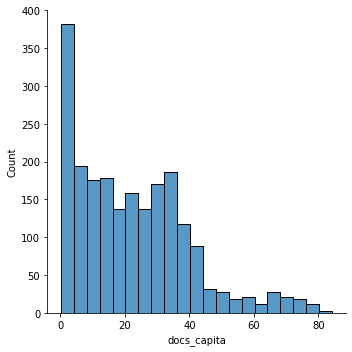

In [157]:
sns.displot(df1.docs_capita)

In [158]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2846
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      2117 non-null   object 
 1   year         2117 non-null   int64  
 2   docs_capita  2117 non-null   float64
 3   no_docs      2117 non-null   float64
 4   no_other     2117 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 99.2+ KB


In [159]:
new = df1[(df1['docs_capita'] <= 5)] 

In [160]:
new.shape

(411, 5)

In [161]:
ordered = new.docs_capita.sort_values(ascending=False)

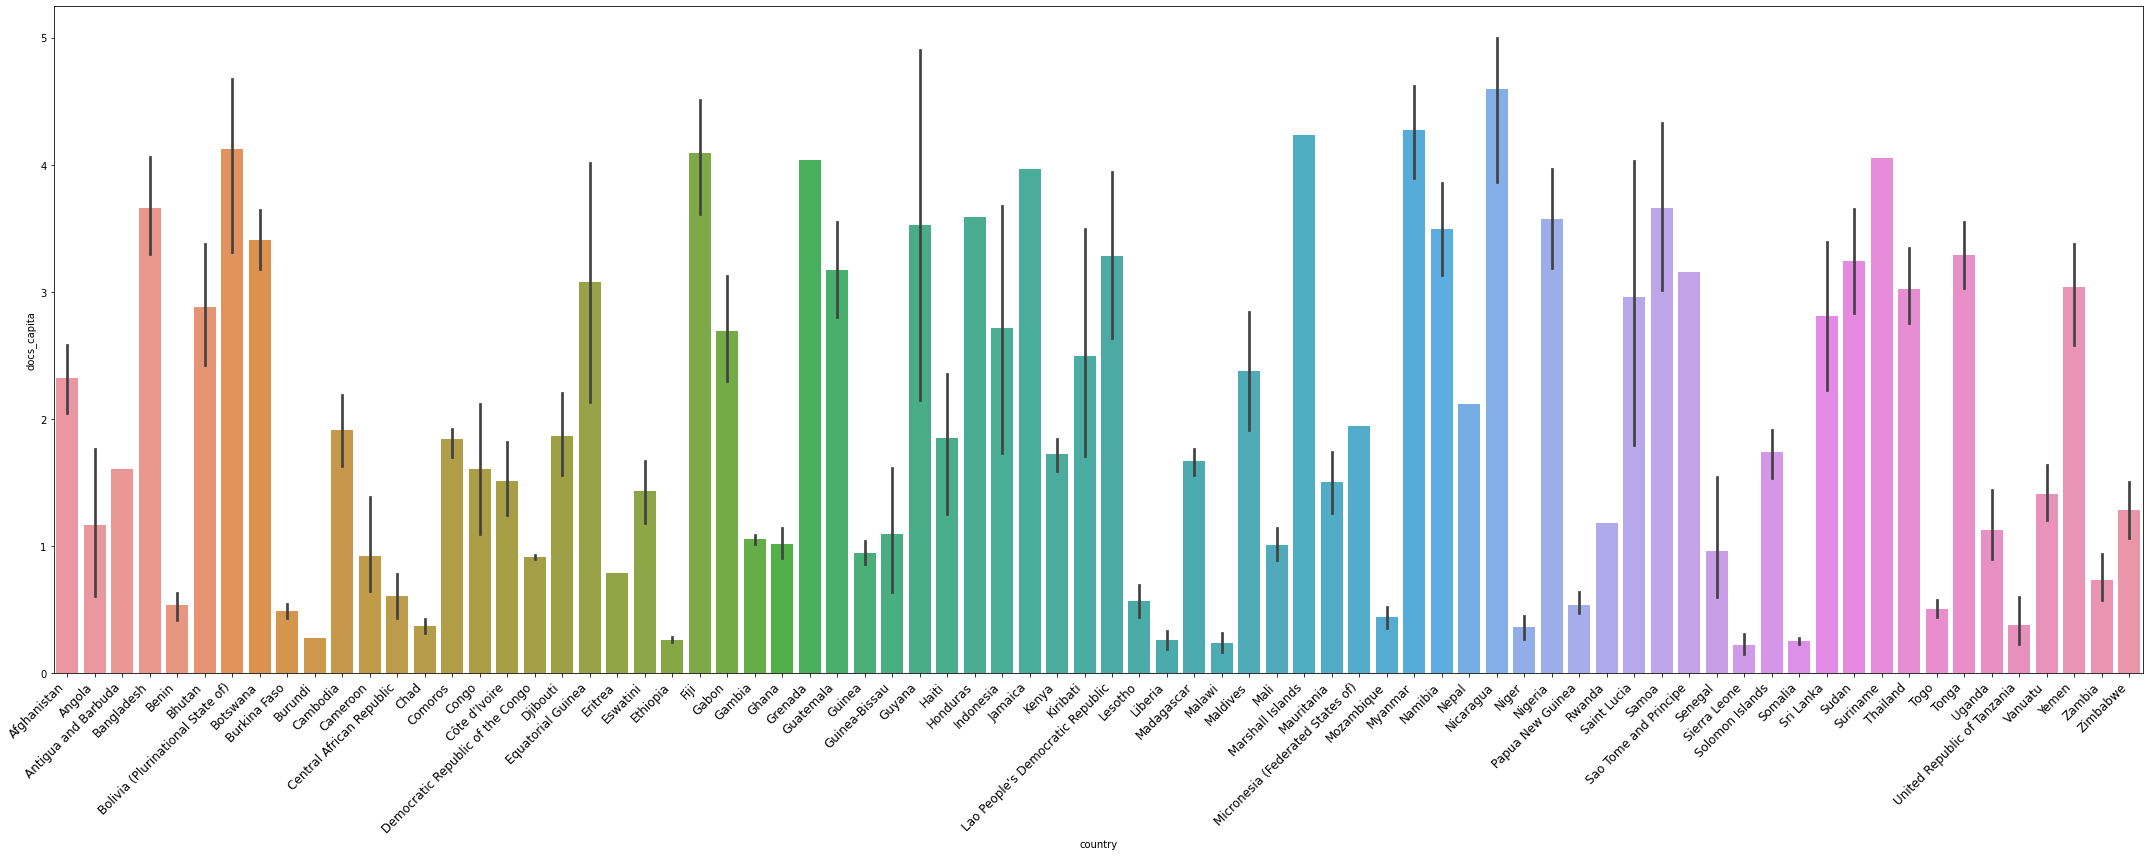

In [162]:

fix, ax = plt.subplots(figsize = (30,12))

g = sns.barplot(data=new, x='country', y=ordered)
g.set_xticklabels(g.get_xticklabels(), rotation=45, ha='right', fontsize = 12)

plt.tight_layout()
plt.show()